In [1]:
import random
import os
import numpy as np
import tensorflow.gfile as gfile
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
from captcha.image import ImageCaptcha

In [2]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
             'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
UPPERCASE = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

CAPTCHA_LEN = 4
CAPTCHA_HEIGHT = 60
CAPTCHA_WIDTH = 160

TRAIN_DATASET_SIZE = 5000
TRAIN_DATA_DIR = './data/train/'

TEST_DATASET_SIZE = 1000
TEST_DATA_DIR = './data/test/'

In [3]:
def get_random_text(charset, length):
    text = [random.choice(charset) for _ in range(length)]
    return ''.join(text)

def build_captcha_dataset(size=100, output_dir='./data', image_format='.png', 
                          charset=NUMBER, length=CAPTCHA_LEN, 
                          height=CAPTCHA_HEIGHT, width=CAPTCHA_WIDTH):
    if (gfile.Exists(output_dir)):
        gfile.DeleteRecursively(output_dir)
    gfile.MakeDirs(output_dir)
    
    captcha = ImageCaptcha(width=width, height=height)
    
    for _ in range(size):
        text = get_random_text(charset, length)
        captcha.write(text, os.path.join(output_dir, text + image_format))

In [4]:
build_captcha_dataset(size=TRAIN_DATASET_SIZE, output_dir=TRAIN_DATA_DIR)
build_captcha_dataset(size=TEST_DATASET_SIZE, output_dir=TEST_DATA_DIR)

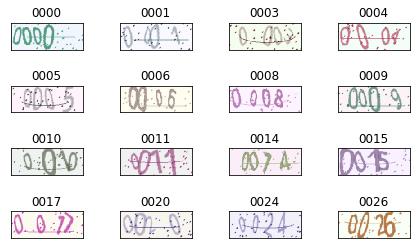

In [5]:
plt.figure()
for i, file_name in zip(range(16), gfile.ListDirectory(TRAIN_DATA_DIR)[0:16]):
    file_path = os.path.join(TRAIN_DATA_DIR, file_name)
    plt.subplot(4, 4, i + 1)
    plt.tight_layout()
    image = img.imread(file_path)
    plt.imshow(image)
    plt.title(os.path.splitext(file_name)[0])
    plt.xticks([])
    plt.yticks([])
plt.show()